# Fun with numpy.random
Exploring numpy.random library as assignment for Programming for Data Analysis, GMIT 2019

Lecturer: dr Brian McGinley

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 11-10-2019

This Notebook should be read in conjuntion with the corresponding README.md file at the assignment repository at GitHub: <https://github.com/andkoc001/fun-with-numpy-random/>, which provides background information, project progress and findings.

___

## Random Sampling

### Setting up the scene

Importing numpy.random library and version check.

In [26]:
import numpy as np # NumPy package
import matplotlib.pyplot as plt # plotting engine
# below command will allow for the plots being displayed inside the notebook, rather than in a separate screen.
%matplotlib inline

In [27]:
np.version.version

'1.17.2'

A built-in help is available, accessible through the following commands:  
`dir()` prints out available funtionalitis of the parsed method  
`help()` shows doc-string of the parsed method

In [28]:
# dir(np.random) # commented out for clarity

In [29]:
# help(np.random.randint) # commented out for clarity

A quick test of the numpy.random routine.

In [30]:
np.random.random() # get a random float number from *uniform distributtion* on [0,1)

0.1687693748028083

___

### Simple random data

Note 1: In this notebook terms _funtion_, _method_, _routine_ and _subroutine_ are used interchangebly.  
Note 2: `np.random` generates pseudo-random numbers, but for simplicity in this notebook _random_ is used interchangebly.

NumPy comes with a large numbers of built-in funtionalities, in the library documentation refered as to routines. Random sampling (`numpy.random`) is an example of such a routine (function). 

**Simple random data** is a collection of methods used for two applications:  
1) generating of a pseudo random number from a range,  
2) random selection of an object from a list.

In the first category, there are several methods, producing different outputs. For instance, the `np.random.random()` generates float numbers from half-open range [0,1), whereas `np.random.randint()` generates integer numbers from a range.

The second category, offers the funtionality of random picking of objects from an existing list. 

Below we will see example use of a few methods from the Simple random data.

`np.random.random`  
This method returns random float number(s) from _uniform distribution_ on [0,1), i.e. from 0 (inclusive) to 1 (exclusive)

In [31]:
# get a random float number from *uniform distributtion* on [0,1), i.e. from 0 (inclusive) to 1 (exclusive)
np.random.random()

0.8064189345267564

In [32]:
# get 5 random numbers from [0,1) and print out avarage of them
sum = 0
for i in range(5):
    x = np.random.random()
    sum = sum + x
    print(i+1,": ",x)
print("Mean:",sum/5)

1 :  0.9304717993476402
2 :  0.0808931834956752
3 :  0.5978830057720895
4 :  0.0826744827817043
5 :  0.4897578480999114
Mean: 0.43633606389940416


In [33]:
# get a n-dimensional array (ndarray) of random numbers on [0,1); when no value is parsed, it returns a simple float number
np.random.random((2,3)) # double brackets, because this method takes a single value only - in this case a tuple

array([[0.7091368 , 0.86844376, 0.63386704],
       [0.55988971, 0.2240129 , 0.87434689]])

`np.random.randn`  
This method generates a n-dimmensional array of numbers from the _standard normal distribution_.

In [34]:
np.random.randn(2, 4)

array([[ 0.19442337, -0.70793628, -1.08174341,  0.65924156],
       [ 0.76011827, -0.94674146,  0.88804236, -1.02983283]])

It may be convenient to compare the `random` and `randn` subroutines to each other with results visualised on a plots.  
Plotting random distribution vs normal distribution.

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


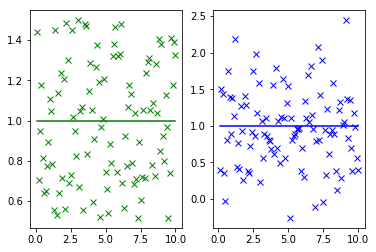

In [83]:
x = np.arange(0.0, 10.1, 0.1) # set range of x values for plotting
y1 = x/x # constant horizontal line against x - will be used as a baseline for showing random noise
y2 = x/x # - will be used as a baseline for showing normal noise
noise_random = np.random.random(size=(len(x)))-0.5 # random noise in on (0,1] and offset by0.5 in order to centralise about the base line
noise_normal = np.random.normal(0.0, 0.5, len(x)) # normal distribution of noise

plt.subplot(1, 2, 1)
plt.plot(x, y1, 'g-') # baseline for random distribution noise
plt.plot(x, y1 + noise_random, 'gx') # green x-es denote random noise value for each sample

plt.subplot(1, 2, 2)
plt.plot(x, y2, 'b-') # baseline for normal distribution noise
plt.plot(x, y2 + noise_normal, 'bx') # blue x-es denote normal noise value for each sample

**np.random.randint**  
This method generates intiger number(s) in a given range.

In [35]:
np.random.randint(1,11, size=3) # 3 random integers in range (1,10) - inclusive

array([9, 6, 9])

In the second category of subroutines of simple random data, from a pre-defined pool of objects.

**np.random.choice**  
This method returns items (not necesserily numbers) from an existing list.

In [64]:
list_1 = [1,2,3,4] # predefinition of list of numbers
list_2 = ["dog", "cat", "snake", "rat"] # predefinition of list of animals

np.random.choice(list_2, size=7)

array(['snake', 'cat', 'rat', 'cat', 'snake', 'dog', 'rat'], dtype='<U5')

It is also possible to assign a probability for each option:

In [37]:
np.random.choice(list_1, p=[0.1, 0.1, 0.1, 0.7], size=10)

array([4, 4, 1, 4, 4, 4, 4, 4, 1, 4])

**np.random.bytes**  
Returns random bytes in hexadecimal format. For example:

In [78]:
np.random.bytes(1)

b'\xe0'

### Permutations

This group of methods in NumPy and allow to randomly reorder the objects in the set or in sub-set (range). It consists of two subroutines: `shuffle` and `permutation`.

#### **random.shuffle**  
`np.random.shuffle` method randomly reorders the items of the entire set _in place_, that is original order is overwritten with the new sequence.

In [66]:
print(list_1) # in original order
np.random.shuffle(list_1)
list_1 # in new order, overwriting the original

[1, 2, 3, 4]


[2, 3, 1, 4]

#### **random.permutation**
`np.random.permutation` method returns a new array (copy of the original) of the objects from a list, randomly ordered.

In [69]:
# we are using lists from previous examples, defined in cells above
np.random.permutation(list_1)

array([3, 1, 4, 2])

It is worth noting that `np.random.permutation` is built up on `np.random.shuffle` subroutine, which is used in the former source code. Extra functionality is provided on codition an array is parsed. Other wise, when an integer is parsed, it behaves as ordinary `shuffle` function.

___

### Distributions

NumPy comes with a selection of built-in random distributions, which are used to sample random data in a specific pattern from statistical science.
In NumPy v1.17.2, there are thirty-five different distributions available. Below we will discuss five ot them, namely: uniform, standard_normal, binominal, exponential, weibull.

#### **random.uniform distribution**
`np.random.uniform` function genrerates random floating point number(s). Each random value returnd from this method is equally probable to occure. The generated numbers are from half-open range - ends decfined when the function is called. If the range is not defined, by defoult it is assumed to be [0,1), in which case the subroutine behaves the same as np.random.random one.

In [85]:
np.random.uniform(size=3)

array([0.53133323, 0.76267893, 0.70070336])

In [92]:
np.mean(np.random.uniform(0.9,1, size=10) * 10)

9.505968132410079

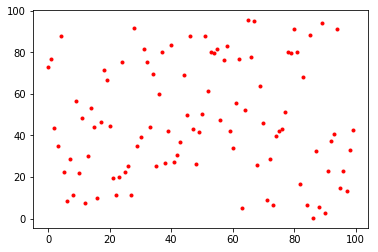

In [99]:
plt.plot(np.random.uniform(0,100, size=100), 'r.')

The uniform distribution shows a property to fill out histograms bins uniformly, which becomes clearer for increasing number of samples.

(array([ 99680.,  99863., 100189., 100130.,  99959., 100101.,  99817.,
         99769., 100308., 100184.]),
 array([8.18278999e-05, 1.00000564e+01, 2.00000310e+01, 3.00000056e+01,
        3.99999801e+01, 4.99999547e+01, 5.99999293e+01, 6.99999039e+01,
        7.99998785e+01, 8.99998530e+01, 9.99998276e+01]),
 <a list of 10 Patch objects>)

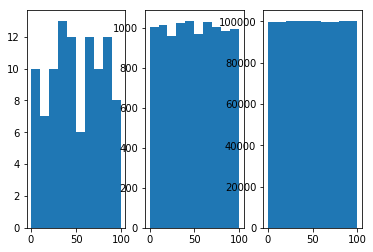

In [122]:
plt.subplot(1, 3, 1)
plt.hist(np.random.uniform(0,100, size=10**2)) # 100 samples

plt.subplot(1, 3, 2)
plt.hist(np.random.uniform(0,100, size=10**4)) # 10000 samples

plt.subplot(1, 3, 3)
plt.hist(np.random.uniform(0,100, size=10**6)) # 1000000 samples

#### **random.standard_normal**  

`np.random.standard_normal` draws a standard normal (Gaussian) distribution for mean=0 and diviation=1 (another NumPy distribution, `np.random.normal`, allows to change these parameters). The more samples, the more "ideal" shape of the distribution.

Actual minimum:  -2.8330263043530515
Actual maximum:  3.933337043656327
Actual mean:  -0.013579647217109567
Actual standard diviation:  1.0030264084659057


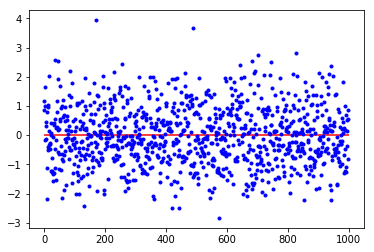

In [160]:
a = np.random.standard_normal(size=1000) # standard normal distribution generation for n=1000 samples

plt.hlines(0,0,1000, colors='r') # baseline 
plt.plot(a, 'b.')

# for reference, actual distribution parameters from the generated set
print("Actual minimum: ", np.min(a))
print("Actual maximum: ", np.max(a))
print("Actual mean: ", np.mean(a))
print("Actual standard diviation: ", np.std(a))

(array([  2.,   6.,  24.,  35.,  67.,  80., 125., 137., 132., 115.,  87.,
         76.,  48.,  26.,  29.,   7.,   2.,   0.,   0.,   2.]),
 array([-2.8330263 , -2.49470814, -2.15638997, -1.8180718 , -1.47975363,
        -1.14143547, -0.8031173 , -0.46479913, -0.12648097,  0.2118372 ,
         0.55015537,  0.88847354,  1.2267917 ,  1.56510987,  1.90342804,
         2.24174621,  2.58006437,  2.91838254,  3.25670071,  3.59501888,
         3.93333704]),
 <a list of 20 Patch objects>)

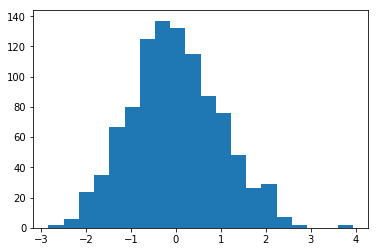

In [175]:
plt.hist(a, bins=20)

#### **random.binominal**  

`np.random.binominal` returns...